### Import Relevant Libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
# sns.set()
plt.style.use('fivethirtyeight')

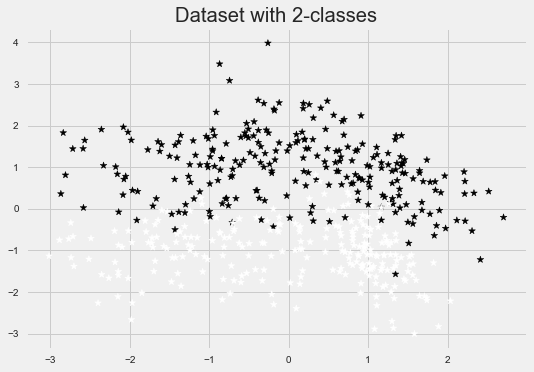

In [74]:
X,Y = make_classification(n_features=2,n_samples=500,n_redundant=0,n_informative=2,random_state=20,flip_y=0)
plt.scatter(X[:,0],X[:,1],c=Y,marker='*')
plt.title('Dataset with 2-classes')
plt.show()

### Logistic Regression

In [51]:
def hypothesis(x, w, b):
    z = np.dot(w, x) + b
    return sigmoid(z)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
    return -err/x.shape[0]

def grads(x,y,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b += (y[i] - hx)
    return [grad_w/m, grad_b/m]

def gradientAscent(x,y,learning_rate=0.4,iterations=350):
    w=np.zeros((2,))
    b = 0.5 # initialized randomly
    loss = []
    
    for i in range(iterations):
        err = error(x,y,w,b)
        loss.append(err)
        grad_w, grad_b = grads(x,y,w,b)
        w = w + learning_rate*grad_w
        b = b + learning_rate*grad_b
        
        if(i%20==0):
            print(err)
    return w,b,loss
    
    

In [52]:
w,b,loss = gradientAscent(X,Y)

1.0446222742984834
0.3979517623229331
0.3428329753006468
0.3229298337242104
0.3129472603906702
0.3071341843417283
0.3034463251146584
0.30097284378011835
0.29924780025531955
0.2980094928315296
0.2971006697635269
0.2964218957683155
0.29590773742448556
0.2955137384301606
0.2952088957579194
0.2949711149795979
0.29478436118010914
0.29463681587221024


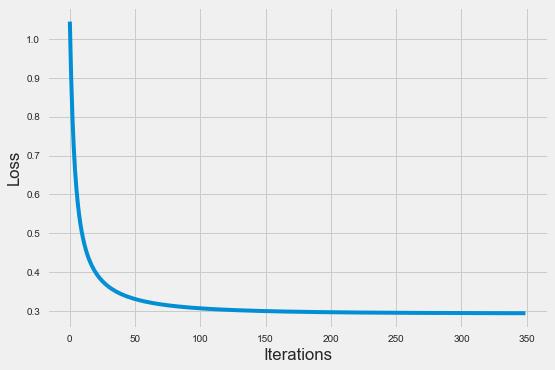

In [68]:
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

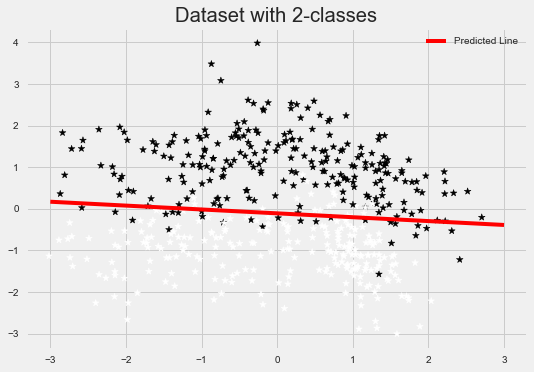

In [80]:
plt.scatter(X[:,0],X[:,1],c=Y,marker='*')
plt.title('Dataset with 2-classes')
X_ = np.linspace(-3,3,20)
Y_ = -(b + w[0]*X_)/w[1]
plt.plot(X_,Y_,c="r",label='Predicted Line')
plt.legend()
plt.show()
